<a href="https://colab.research.google.com/github/Ahmed-Shatla/CIFAR10-/blob/main/Achieve_high_accuracy_on_image_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers, optimizers
import numpy as np
from matplotlib import pyplot

In [3]:
(x_train, y_train) , (x_test,y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [4]:
print("training data = ", x_train.shape)
print("testing data = ", x_test.shape)

training data =  (50000, 32, 32, 3)
testing data =  (10000, 32, 32, 3)


In [5]:
mean = np.mean(x_train)
std = np.std(x_train)
x_train = (x_train-mean)/std
x_test = (x_test-mean)/std


In [6]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [7]:

weight_decay = 1e-4

# instantiate an empty sequential model
model = Sequential()

# CONV1
# notice that we defined the input_shape here because this is the first CONV layer.
# we don’t need to do that for the remaining layers
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

# CONV2
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# CONV3
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# CONV4
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# CONV5
model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

# CONV6
model.add(Conv2D(256, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# FC7
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# print model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                       

In [8]:
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )

# compute the data augmentation on the training set
datagen.fit(x_train)

In [11]:
batch_size = 64
epochs=125
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.125epochs.hdf5', verbose=1, save_best_only=True)

# you can try any of these optimizers by uncommenting the line
# optimizer = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
# optimizer = keras.optimizers.adam(lr=0.0005,decay=1e-6)

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), callbacks=[checkpointer],
                steps_per_epoch=x_train.shape[0] // batch_size, epochs=epochs,verbose=2,
                validation_data=(x_test,y_test))

Epoch 1/125


<ipython-input-11-1d5a5adf8f3e>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), callbacks=[checkpointer],



Epoch 1: val_loss improved from inf to 1.55283, saving model to model.125epochs.hdf5
781/781 - 47s - loss: 2.2880 - accuracy: 0.4148 - val_loss: 1.5528 - val_accuracy: 0.5605 - 47s/epoch - 60ms/step
Epoch 2/125


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 1.55283 to 1.29820, saving model to model.125epochs.hdf5
781/781 - 34s - loss: 1.6090 - accuracy: 0.5694 - val_loss: 1.2982 - val_accuracy: 0.6240 - 34s/epoch - 43ms/step
Epoch 3/125

Epoch 3: val_loss improved from 1.29820 to 1.22958, saving model to model.125epochs.hdf5
781/781 - 35s - loss: 1.3577 - accuracy: 0.6355 - val_loss: 1.2296 - val_accuracy: 0.6514 - 35s/epoch - 44ms/step
Epoch 4/125

Epoch 4: val_loss did not improve from 1.22958
781/781 - 35s - loss: 1.2285 - accuracy: 0.6630 - val_loss: 1.7497 - val_accuracy: 0.6624 - 35s/epoch - 44ms/step
Epoch 5/125

Epoch 5: val_loss improved from 1.22958 to 0.96247, saving model to model.125epochs.hdf5
781/781 - 33s - loss: 1.1046 - accuracy: 0.6941 - val_loss: 0.9625 - val_accuracy: 0.7411 - 33s/epoch - 43ms/step
Epoch 6/125

Epoch 6: val_loss improved from 0.96247 to 0.91467, saving model to model.125epochs.hdf5
781/781 - 33s - loss: 0.9827 - accuracy: 0.7228 - val_loss: 0.9147 - val_accuracy: 0.758

In [12]:
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

79/79 [==============================] - 2s 11ms/step - loss: 0.6105 - accuracy: 0.8683

Test result: 86.830 loss: 0.611


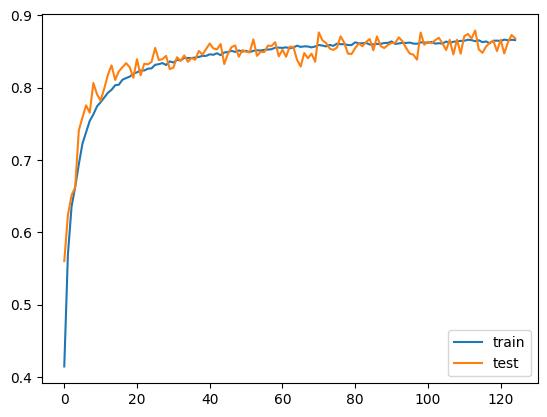

In [15]:
# plot learning curves of model accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()